In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [7]:
RHTDM=pd.read_csv(r"C:\Users\Nikita\Downloads\diabetes.csv")

In [8]:
RHTDM

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
RHTDM.describe(percentiles=[0.01, .02, .025, .05, 0.1, .95, .96,.97,.975, .98, .99]).T

,count,mean,std,min,1%,2%,2.5%,5%,10%,50%,95%,96%,97%,97.5%,98%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,0.00000,0.000000,0.00000,0.000,3.0000,10.00000,11.00000,11.00000,12.00000,12.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,57.00000,69.02000,71.175000,79.00000,85.000,117.0000,181.00000,184.00000,187.99000,189.00000,192.32000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.00000,0.00000,0.000000,38.70000,54.000,72.0000,90.00000,92.00000,94.99000,96.00000,99.32000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,0.000000,0.00000,0.000,23.0000,44.00000,45.32000,46.00000,47.00000,48.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,0.000000,0.00000,0.000,30.5000,293.00000,325.00000,369.90000,400.25000,470.94000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,0.00000,19.16800,19.517500,21.80000,23.600,32.0000,44.39500,45.33200,46.10000,46.46500,47.52600,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.09468,0.11902,0.123525,0.14035,0.165,0.3725,1.13285,1.18424,1.25793,1.31345,1.39066,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.000000,21.00000,22.000,29.0000,58.00000,60.00000,62.00000,63.00000,64.66000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.000000,0.00000,0.000,0.0000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00


In [10]:
RHTDM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
RHTDM

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
dia= RHTDM

In [13]:
dia['BloodPressure']=dia['BloodPressure'].replace(0,dia['BloodPressure'].mean())

In [14]:
dia['BloodPressure'].isnull().sum()

0

In [15]:
dia['Insulin'].median()

30.5

In [16]:
dia['Insulin']=dia['Insulin'].replace(0,dia['Insulin'].mean())

In [17]:
dia[dia['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64.000000,0,79.799479,23.3,0.672,32,1
5,5,116,74.000000,0,79.799479,25.6,0.201,30,0
7,10,115,69.105469,0,79.799479,35.3,0.134,29,0
9,8,125,96.000000,0,79.799479,0.0,0.232,54,1
10,4,110,92.000000,0,79.799479,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72.000000,0,79.799479,36.3,0.258,52,1
758,1,106,76.000000,0,79.799479,37.5,0.197,26,0
759,6,190,92.000000,0,79.799479,35.5,0.278,66,1
762,9,89,62.000000,0,79.799479,22.5,0.142,33,0


In [18]:
dia['SkinThickness']=dia['SkinThickness'].replace(0,dia['SkinThickness'].median())

In [19]:
dia['SkinThickness']=np.where(dia['SkinThickness']>54.330,54.330,dia['SkinThickness'])

In [20]:
dia[dia['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48.0,20.0,79.799479,24.7,0.140,22,0
182,1,0,74.0,20.0,23.000000,27.7,0.299,21,0
342,1,0,68.0,35.0,79.799479,32.0,0.389,22,0
349,5,0,80.0,32.0,79.799479,41.0,0.346,37,1
502,6,0,68.0,41.0,79.799479,39.0,0.727,41,1


In [21]:
dia['Glucose']=dia['Glucose'].replace(0,dia['Glucose'].median())

In [22]:
dia['Pregnancies']=np.where(dia['Pregnancies']>10,9,dia['Pregnancies'])

In [23]:
dia['BMI'].median()

32.0

In [24]:
dia['BMI']=dia['BMI'].replace(0,dia['BMI'].median())
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.0,79.799479,33.6,0.627,50,1
1,1,85,66.0,29.0,79.799479,26.6,0.351,31,0
2,8,183,64.0,23.0,79.799479,23.3,0.672,32,1
3,1,89,66.0,23.0,94.000000,28.1,0.167,21,0
4,0,137,40.0,35.0,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.0,180.000000,32.9,0.171,63,0
764,2,122,70.0,27.0,79.799479,36.8,0.340,27,0
765,5,121,72.0,23.0,112.000000,26.2,0.245,30,0
766,1,126,60.0,23.0,79.799479,30.1,0.349,47,1


In [25]:
dia[dia['DiabetesPedigreeFunction']>=1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40.0,35.00,168.000000,43.1,2.288,33,1
12,10,139,80.0,23.00,79.799479,27.1,1.441,57,0
39,4,111,72.0,47.00,207.000000,37.1,1.390,56,1
45,0,180,66.0,39.00,79.799479,42.0,1.893,25,1
58,0,146,82.0,23.00,79.799479,40.5,1.781,44,0
100,1,163,72.0,23.00,79.799479,39.0,1.222,33,1
131,9,122,56.0,23.00,79.799479,33.3,1.114,33,1
147,2,106,64.0,35.00,119.000000,30.5,1.400,34,0
152,9,156,86.0,28.00,155.000000,34.3,1.189,42,1
187,1,128,98.0,41.00,58.000000,32.0,1.321,33,1


In [26]:
corr1=dia.corr()


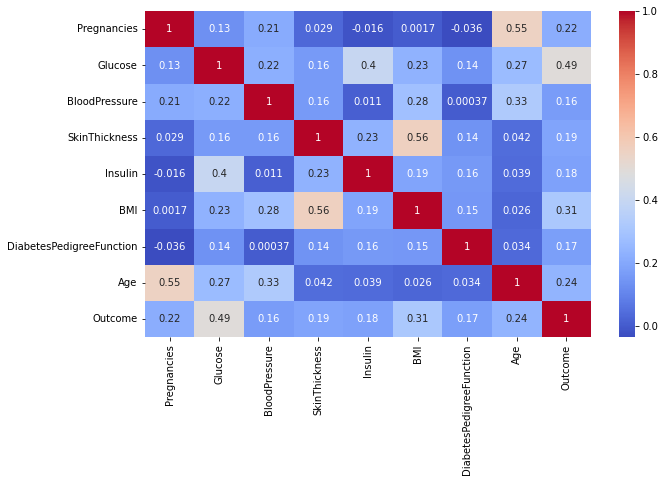

In [27]:
cplt.figure(figsize=(10,6))
sns.heatmap(corr1,annot=True,cmap='coolwarm')
plt.show()

In [28]:
dia['DiabetesPedigreeFunction']=np.where(dia['DiabetesPedigreeFunction']>1,1,dia['DiabetesPedigreeFunction'])

In [29]:
dia.describe(percentiles=[0.01, .02, .025, .05, 0.1,.25,.75,.9,.95, .96,.97,.975, .98, .99]).T

,count,mean,std,min,1%,2%,2.5%,5%,10%,25%,50%,75%,90%,95%,96%,97%,97.5%,98%,99%,max
Pregnancies,768.0,3.697917,3.040774,0.000,0.00000,0.00000,0.000000,0.00000,0.000,1.000000,3.000000,6.00000,9.0000,9.000,9.000,9.99,10.000,10.000,10.000,10.00
Glucose,768.0,121.656250,30.438286,44.000,67.67000,72.34000,74.000000,80.00000,86.700,99.750000,117.000000,140.25000,167.0000,181.000,184.000,187.99,189.000,192.320,196.000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,44.00000,48.68000,50.000000,52.00000,58.000,64.000000,72.000000,80.00000,88.0000,90.000,92.000,94.99,96.000,99.320,106.000,122.00
SkinThickness,768.0,27.255625,8.840358,7.000,10.00000,12.00000,12.000000,14.35000,18.000,23.000000,23.000000,32.00000,40.0000,44.000,45.320,46.00,47.000,48.000,51.330,54.33
Insulin,768.0,118.660163,93.080358,14.000,24.34000,37.34000,41.175000,50.00000,67.000,79.799479,79.799479,127.25000,210.0000,293.000,325.000,369.90,400.250,470.940,519.900,846.00
BMI,768.0,32.450911,6.875366,18.200,19.50000,20.40000,21.000000,22.23500,24.000,27.500000,32.000000,36.60000,41.5000,44.395,45.332,46.10,46.465,47.526,50.759,67.10
DiabetesPedigreeFunction,768.0,0.448178,0.260494,0.078,0.09468,0.11902,0.123525,0.14035,0.165,0.243750,0.372500,0.62625,0.8786,1.000,1.000,1.00,1.000,1.000,1.000,1.00
Age,768.0,33.240885,11.760232,21.000,21.00000,21.00000,21.000000,21.00000,22.000,24.000000,29.000000,41.00000,51.0000,58.000,60.000,62.00,63.000,64.660,67.000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.000000,0.00000,0.000,0.000000,0.000000,1.00000,1.0000,1.000,1.000,1.00,1.000,1.000,1.000,1.00


In [30]:
dia.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [31]:
x=dia[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y=dia['Outcome']


In [32]:
x_train,  x_test,y_train , y_test=train_test_split(x,y, test_size=.25, random_state=9)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
diab=DecisionTreeClassifier()
diab.fit(x_train,y_train)

DecisionTreeClassifier()

In [35]:
print('Train accuracy:', diab.score(x_train,y_train))
print('Test accuracy:', diab.score(x_test,y_test))

Train accuracy: 1.0
Test accuracy: 0.671875


In [36]:
from sklearn.model_selection import GridSearchCV

params={"criterion":['gini','entropy'],"max_depth" : [6,8,10,20],"min_samples_split" : [10,100,200],"min_samples_leaf":[5,10,50]}

dt_cv=DecisionTreeClassifier()

Gsearch_dt=GridSearchCV(estimator=dt_cv,param_grid=params,cv=10,n_jobs=2,verbose=1,scoring='accuracy')

Gsearch_dt.fit(x_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 50],
                         'min_samples_split': [10, 100, 200]},
             scoring='accuracy', verbose=1)

In [37]:
Gsearch_dt.best_score_

0.7603448275862069

In [38]:
Gsearch_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 10}

In [39]:
diab1=DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 6,
 min_samples_leaf= 50,
 min_samples_split= 10)
diab1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=50,
                       min_samples_split=10)

In [40]:
print(diab1.score(x_train,y_train))
diab1.score(x_test,y_test)

0.7899305555555556


0.7552083333333334

In [41]:
pred_train=diab1.predict(x_train)
pred_test=diab1.predict(x_test)

In [42]:
cnf=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["act_0", "act_1"])
cnf

,Pred_0,Pred_1
act_0,331,46
act_1,75,124


In [43]:
print(metrics.classification_report(y_train, pred_train)) 

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       377
           1       0.73      0.62      0.67       199

    accuracy                           0.79       576
   macro avg       0.77      0.75      0.76       576
weighted avg       0.79      0.79      0.79       576



In [44]:
cnfTest=pd.DataFrame(metrics.confusion_matrix(y_test , pred_test), columns=["Pred_0", "Pred_1"],
                index=["act_0", "act_1"])
cnfTest

,Pred_0,Pred_1
act_0,103,20
act_1,27,42


In [45]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       123
           1       0.68      0.61      0.64        69

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.75      0.76      0.75       192



In [46]:
diab1.feature_importances_

array([0.        , 0.58541114, 0.        , 0.        , 0.        ,
       0.26150906, 0.01917336, 0.13390644])

In [47]:
pd.DataFrame({'Var':x_train.columns,'Imp':diab1.feature_importances_}).sort_values(by=["Imp"],ascending=False)

,Var,Imp
1,Glucose,0.585411
5,BMI,0.261509
7,Age,0.133906
6,DiabetesPedigreeFunction,0.019173
0,Pregnancies,0.000000
2,BloodPressure,0.000000
3,SkinThickness,0.000000
4,Insulin,0.000000


## Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 6,
 min_samples_leaf= 50,
 min_samples_split= 10,
 bootstrap = True,n_jobs = -1, random_state=9)

In [50]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=50, min_samples_split=10,
                       n_jobs=-1, random_state=9)

In [51]:
print("R^2 is train: ", random_forest.score(x_train, y_train))
print("R^2 is test: ", random_forest.score(x_test, y_test))

R^2 is train:  0.7899305555555556
R^2 is test:  0.7447916666666666


## Logistic Regression

In [52]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [53]:
log=LogisticRegression()

In [54]:
log.fit(x_train,y_train)

C:\Users\Nikita\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
print(f"Training Score : {log.score(x_train, y_train)}")
print(f"Testing Score : {log.score(x_test, y_test)}")

Training Score : 0.7899305555555556
Testing Score : 0.7395833333333334


In [56]:
pred_train=log.predict(x_train)
pred_test=log.predict(x_test)

In [57]:
cnf=pd.DataFrame(metrics.confusion_matrix(y_train , pred_train), columns=["Pred_0", "Pred_1"],
                index=["act_0", "act_1"])
cnf

,Pred_0,Pred_1
act_0,340,37
act_1,84,115


In [58]:
print(metrics.classification_report(y_train, pred_train)) 

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       377
           1       0.76      0.58      0.66       199

    accuracy                           0.79       576
   macro avg       0.78      0.74      0.75       576
weighted avg       0.79      0.79      0.78       576



In [59]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       123
           1       0.66      0.58      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.73      0.74      0.74       192

